In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/Top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

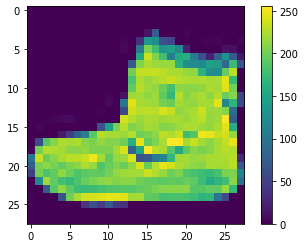

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

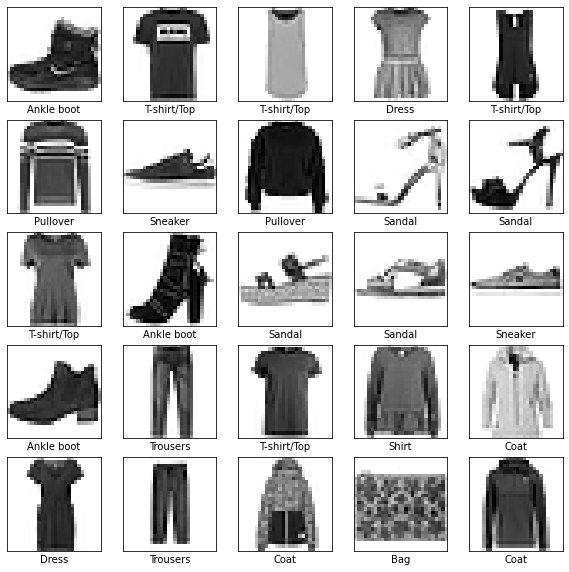

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
#budowa modelu sieci neuronowej
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5034 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3758 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3371 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3132 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2944 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2819 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2710 - accuracy: 0.8994
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2588 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2502 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [11]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'Test modelu -> accuracy: {test_acc}, strata: {test_loss}')

313/313 - 1s - loss: 0.3334 - accuracy: 0.8821 - 578ms/epoch - 2ms/step
Test modelu -> accuracy: 0.882099986076355, strata: 0.3334161639213562


In [12]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [13]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [14]:
predictions[0]

array([5.4261473e-05, 7.5521038e-09, 9.7415011e-07, 3.7862837e-09,
 7.1965019e-07, 4.5641130e-04, 1.0296079e-07, 1.0574493e-02,
 2.2158586e-06, 9.8891073e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

In [17]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]
    ),
               color=color)

In [18]:
def plot_value_array(i,predictions_array,true_label):
    true_label= true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color='#777777') 
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

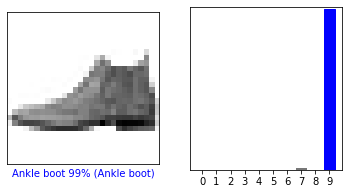

In [19]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

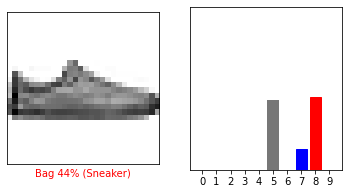

In [20]:
i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

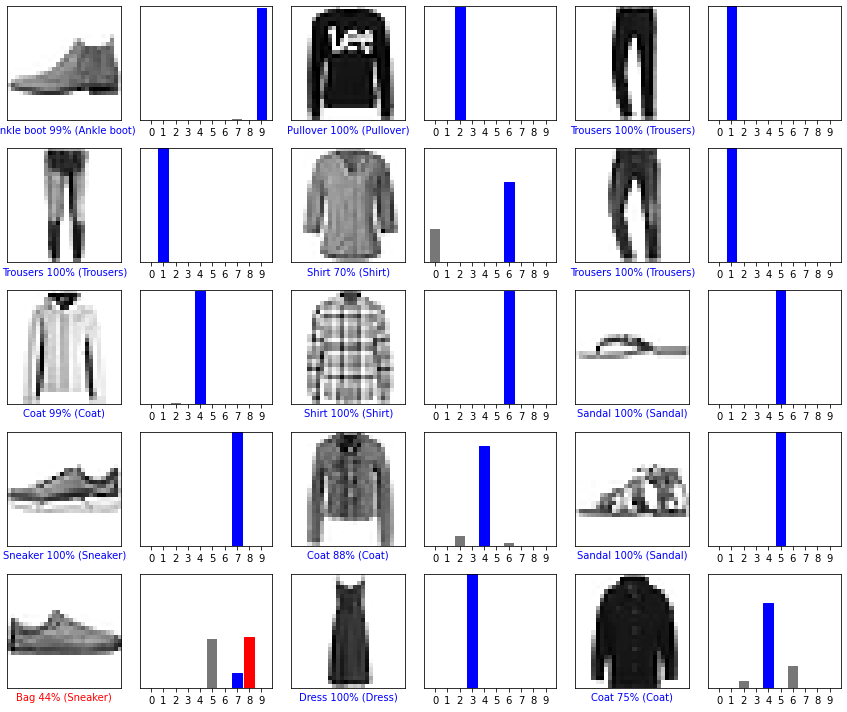

In [21]:
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [22]:
img = test_images[1]
print(img.shape)

(28, 28)


In [23]:
img = (np.expand_dims(img,0))
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(1, 28, 28)


In [24]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[1.8096298e-04 1.0523510e-12 9.9893802e-01 5.9758481e-10 4.4721263e-04
  1.7615254e-13 4.3377528e-04 2.5673706e-19 9.8962533e-11 4.1476104e-16]]


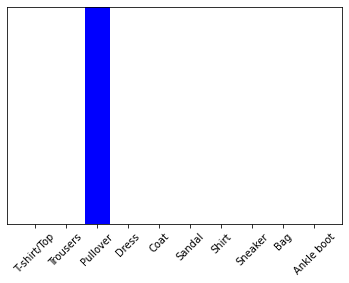

In [25]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
plt.show()

In [28]:
from sklearn.metrics import confusion_matrix

#macierz pomyłek
pred = np.argmax(predictions,axis=1)
cm = confusion_matrix(test_labels,pred)

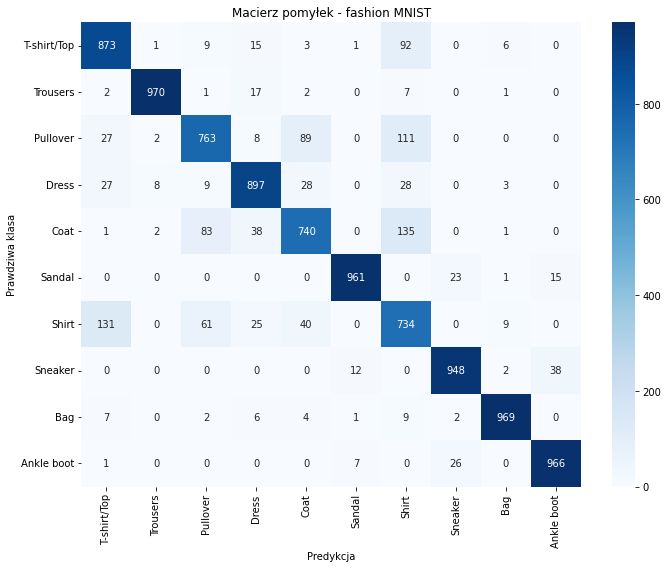

In [30]:
#wizualizacja
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_names, yticklabels=class_names)
plt.title("Macierz pomyłek - fashion MNIST")
plt.xlabel("Predykcja")
plt.ylabel("Prawdziwa klasa")
plt.tight_layout()
plt.show()

In [31]:
print("statystyka pomyłek:")
trafienia = np.trace(cm)
wszystkie = np.sum(cm)
pomylki = wszystkie - trafienia

print(f"liczba trafień: {trafienia}")
print(f"liczba pomyłek: {pomylki}")
print(f"procent trafień: {trafienia/wszystkie*100:.2f}%")
print(f"procent pomyłek: {pomylki/wszystkie*100:.2f}%")

statystyka pomyłek:
liczba trafień: 8821
liczba pomyłek: 1179
procent trafień: 88.21%
procent pomyłek: 11.79%
